In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import math
import imageio
from PIL import Image, ImageDraw, ImageFont

In [2]:
T=1
j=1
n=50

In [3]:
def latticecreate(n):
    lattice = np.random.choice(a=[-1,1],size=(n,n))
    return lattice

In [4]:
def calculateenergy(lattice,n,j,T):
    font = ImageFont.truetype('Pillow/Tests/fonts/FreeMono.ttf', 12)
    image=[]
    l=0
    la=0
    for k in range (0,n*20):
        for l in range (0,n*20):
            x=np.random.randint(0,n)
            y=np.random.randint(0,n)
            x1=np.random.randint(0,n)
            y1=np.random.randint(0,n)
            if lattice[x,y]==lattice[x1,y1]:
                continue
            
            else:
                nb = lattice[(x+1)%n,y] + lattice[x,(y+1)%n] + lattice[(x-1)%n,y] + lattice[x,(y-1)%n]
                nb1 = lattice[(x1+1)%n,y1] + lattice[x1,(y1+1)%n] + lattice[(x1-1)%n,y1] + lattice[x1,(y1-1)%n]
                deltaE=lattice[x,y]*2*nb*j
                deltaE1=lattice[x1,y1]*2*nb1*j
                p=random.uniform(0,1)
                p1=random.uniform(0,1)
                if deltaE<0 and deltaE1<0:
                    lattice[x,y]=lattice[x,y]*(-1)
                    lattice[x1,y1]=lattice[x1,y1]*(-1)


                else:
                    r=math.exp((-deltaE)/(T))
                    r1=math.exp((-deltaE1)/(T))
                    if p<r and p1<r:
                        lattice[x,y]=lattice[x,y]*(-1)
                        lattice[x1,y1]=lattice[x1,y1]*(-1)
                    else:
                        lattice[x,y]=lattice[x,y]
                        lattice[x1,y1]=lattice[x1,y1]
                la=la+1
        if l>10:
            lu=str(la)
            im=Image.fromarray(lattice.astype('uint8')).convert('RGBA')
            draw = ImageDraw.Draw(im)
            draw.text((0,0), lu,font=font,fill=(255,0,0,255))
            image.append(im)
            l=0
        l=l+1 
    print("Total no of iterations is",la)
    return lattice,image
                

In [5]:
def calceenergy(config,N):
    '''Energy of a given configuration'''
    energy = 0
    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i,j]
            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
            energy += -nb*S
    return energy/4

In [6]:
def magnetisation(lattice,n):
    mag=0
    for i in range(0,n):
        for j in range(0,n):
            mag=mag+lattice[i,j]
    return mag

Initial magnetisation -14


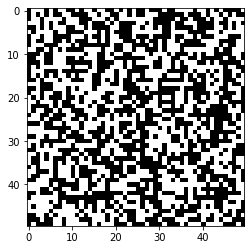

Total no of iterations is 499352
Final magentisation -14


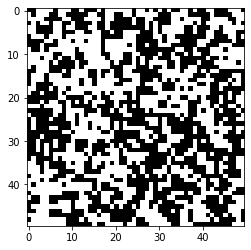

Total energy -550.0


In [7]:
lattice=latticecreate(n)
print("Initial magnetisation",magnetisation(lattice,n))
plt.imshow(lattice, cmap="gray")
plt.show()
newlattice,image=calculateenergy(lattice,n,j,T)
print("Final magentisation",magnetisation(newlattice,n))
plt.imshow(newlattice, cmap="gray")
plt.show()
ef=calceenergy(newlattice,n)
print("Total energy",ef)